In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [3]:
url = "https://heartdisease4.s3.us-east-2.amazonaws.com/heart.csv"

df = pd.read_csv(url)

In [4]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
plt.figure(figsize=(16,14))
sns.heatmap(corr)
plt.show()

<Figure size 1600x1400 with 2 Axes>

In [6]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [7]:
#RECODING
df['sex'] = df['sex'].replace(0, 'Female')
df['sex'] = df['sex'].replace(1, 'Male')
df['cp'] = df['cp'].replace(1, 'Typical')
df['cp'] = df['cp'].replace(2, 'Atypical')
df['cp'] = df['cp'].replace(3, 'Non-Anginal')
df['cp'] = df['cp'].replace(4, 'Asymptomatic')
df['fbs'] = df['fbs'].replace(0, 'False')
df['fbs'] = df['fbs'].replace(1, 'True')
df['restecg'] = df['restecg'].replace(0, 'Normal')
df['restecg'] = df['restecg'].replace(1, 'ST-T Wave Abnormality')
df['restecg'] = df['restecg'].replace(2, 'Left Ventricular Hypertrophy')
df['exang'] = df['exang'].replace(0, 'No')
df['exang'] = df['exang'].replace(1, 'Yes')
df['slope'] = df['slope'].replace(0, 'Missing')
df['slope'] = df['slope'].replace(1, 'Upsloping')
df['slope'] = df['slope'].replace(2, 'Flat')
df['slope'] = df['slope'].replace(3, 'Downsloping')
df['thal'] = df['thal'].replace(0, 'Missing')
df['thal'] = df['thal'].replace(1, 'Normal')
df['thal'] = df['thal'].replace(2, 'Fixed Defect')
df['thal'] = df['thal'].replace(3, 'Reversable Defect')
df['target'] = df['target'].replace(0, 'Probable Heart Disease')
df['target'] = df['target'].replace(1, 'Normal')

df.head(1000)

age     sex           cp  trestbps  chol    fbs  \
0     63    Male  Non-Anginal       145   233   True   
1     37    Male     Atypical       130   250  False   
2     41  Female      Typical       130   204  False   
3     56    Male      Typical       120   236  False   
4     57  Female            0       120   354  False   
5     57    Male            0       140   192  False   
6     56  Female      Typical       140   294  False   
7     44    Male      Typical       120   263  False   
8     52    Male     Atypical       172   199   True   
9     57    Male     Atypical       150   168  False   
10    54    Male            0       140   239  False   
11    48  Female     Atypical       130   275  False   
12    49    Male      Typical       130   266  False   
13    64    Male  Non-Anginal       110   211  False   
14    58  Female  Non-Anginal       150   283   True   
15    50  Female     Atypical       120   219  False   
16    58  Female     Atypical       120   340  False   
17    66  Female  Non-Anginal       150   226  False   
18    43    Male            0       150   247  False   
19    69  Female  Non-Anginal       140   239  False   
20    59    Male            0       135   234  False   
21    44    Male     Atypical       130   233  False   
22    42    Male            0       140   226  False   
23    61    Male     Atypical       150   243   True   
24    40    Male  Non-Anginal       140   199  False   
25    71  Female      Typical       160   302  False   
26    59    Male     Atypical       150   212   True   
27    51    Male     Atypical       110   175  False   
28    65  Female     Atypical       140   417   True   
29    53    Male     Atypical       130   197   True   
..   ...     ...          ...       ...   ...    ...   
273   58    Male            0       100   234  False   
274   47    Male            0       110   275  False   
275   52    Male            0       125   212  False   
276   58    Male            0       146   218  False   
277   57    Male      Typical       124   261  False   
278   58  Female      Typical       136   319   True   
279   61    Male            0       138   166  False   
280   42    Male            0       136   315  False   
281   52    Male            0       128   204   True   
282   59    Male     Atypical       126   218   True   
283   40    Male            0       152   223  False   
284   61    Male            0       140   207  False   
285   46    Male            0       140   311  False   
286   59    Male  Non-Anginal       134   204  False   
287   57    Male      Typical       154   232  False   
288   57    Male            0       110   335  False   
289   55  Female            0       128   205  False   
290   61    Male            0       148   203  False   
291   58    Male            0       114   318  False   
292   58  Female            0       170   225   True   
293   67    Male     Atypical       152   212  False   
294   44    Male            0       120   169  False   
295   63    Male            0       140   187  False   
296   63  Female            0       124   197  False   
297   59    Male            0       164   176   True   
298   57  Female            0       140   241  False   
299   45    Male  Non-Anginal       110   264  False   
300   68    Male            0       144   193   True   
301   57    Male            0       130   131  False   
302   57  Female      Typical       130   236  False   

                          restecg  thalach exang  oldpeak      slope  ca  \
0                          Normal      150    No      2.3    Missing   0   
1           ST-T Wave Abnormality      187    No      3.5    Missing   0   
2                          Normal      172    No      1.4       Flat   0   
3           ST-T Wave Abnormality      178    No      0.8       Flat   0   
4           ST-T Wave Abnormality      163   Yes      0.6       Flat   0   
5           ST-T Wave Abnormality      148    No      0.4  Upsloping   0   


## RENAME AFTER RE-CODING

In [16]:
clean_df = df.rename(columns={
    'age': 'Age',
    'sex': 'Gender',
    'cp': 'Chest Pain Type',
    'trestbps': 'Resting Blood Pressure mmHg',
    'chol': 'Serum Cholestorol mg_dl',
    'fbs': 'Fasting Blood Sugar  120 mg_dl',
    'restecg': 'Resting Electrocardiographic Results',
    'thalach': 'Maximum Heart Rate Achieved',
    'exang': 'Exercise Induced Angina',
    'oldpeak': 'ST Depression induced by exercise relative to rest',
    'slope': 'Slope of the Peak Exercise ST Segment',
    'ca': 'Vessels Colored by Fluoroscopy',
    'thal': 'Thal',
    'target': 'Diagnosis of Heart Disease Angiographic Disease Status'
})
clean_df.head()

Age  Gender Chest Pain Type  Resting Blood Pressure mmHg  \
0   63    Male     Non-Anginal                          145   
1   37    Male        Atypical                          130   
2   41  Female         Typical                          130   
3   56    Male         Typical                          120   
4   57  Female               0                          120   

   Serum Cholestorol mg_dl Fasting Blood Sugar  120 mg_dl  \
0                      233                           True   
1                      250                          False   
2                      204                          False   
3                      236                          False   
4                      354                          False   

  Resting Electrocardiographic Results  Maximum Heart Rate Achieved  \
0                               Normal                          150   
1                ST-T Wave Abnormality                          187   
2                               Normal                          172   
3                ST-T Wave Abnormality                          178   
4                ST-T Wave Abnormality                          163   

  Exercise Induced Angina  ST Depression induced by exercise relative to rest  \
0                      No                                                2.3    
1                      No                                                3.5    
2                      No                                                1.4    
3                      No                                                0.8    
4                     Yes                                                0.6    

  Slope of the Peak Exercise ST Segment  Vessels Colored by Fluoroscopy  \
0                               Missing                               0   
1                               Missing                               0   
2                                  Flat                               0   
3                                  Flat                               0   
4                                  Flat                               0   

           Thal Diagnosis of Heart Disease Angiographic Disease Status  
0        Normal                                             Normal      
1  Fixed Defect                                             Normal      
2  Fixed Defect                                             Normal      
3  Fixed Defect                                             Normal      
4  Fixed Defect                                             Normal

In [26]:
# This will allow us to pull from RDS AWS instead of S3.
# With this you SHOULD be able to run SQL queries.

from sqlalchemy import create_engine

uid = "postgres"
pwd = "Tt153426+"
database = "postgres"
server = "database-2.cniesb9g0fnz.us-east-2.rds.amazonaws.com:5432"
engine = create_engine(f"postgresql://{uid}:{pwd}@{server}/{database}")
conn = engine.connect() 

In [ ]:
# This will allow us to pull from RDS AWS instead of S3.
# With this you SHOULD be able to run SQL queries.
clean_df.to_sql('clean', con=engine)

In [ ]:
# This will allow us to pull from RDS AWS instead of S3.
# With this you SHOULD be able to run SQL queries.
df = pd.DataFrame(engine.execute("SELECT * FROM clean").fetchall())
df.head()

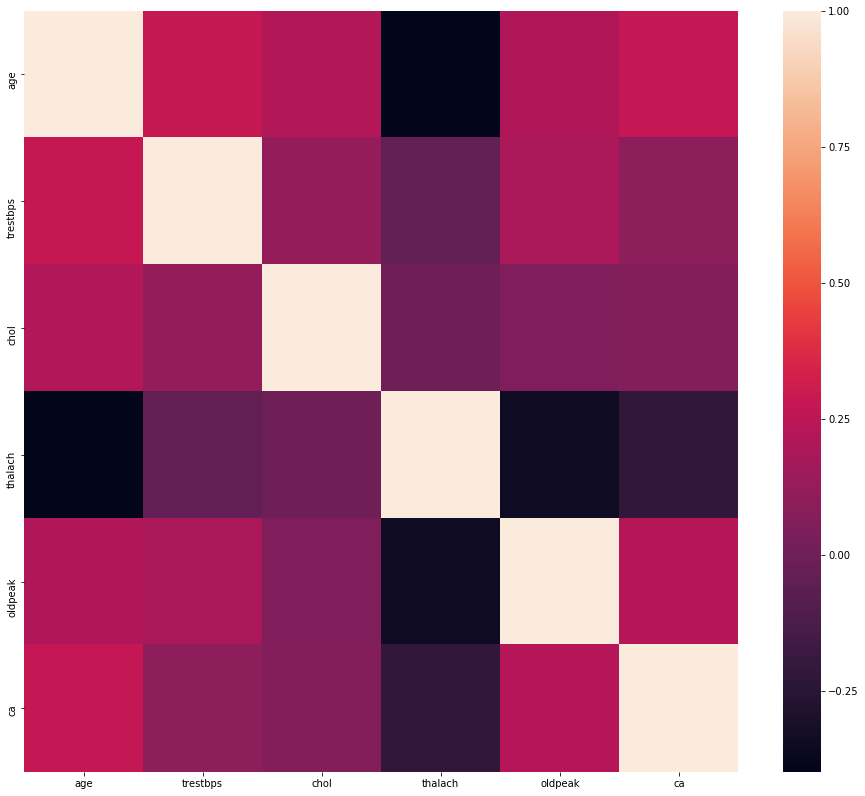

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
plt.figure(figsize=(16,14))
sns.heatmap(corr)
plt.show()